In [9]:
from pyautocad import Autocad, APoint
from shapely import LineString

acad = Autocad()
model = acad.model

In [47]:
selections = acad.get_selection("Выбрать полигон:")
acad_polygon = selections[0]
acad_polygon

Выбрать полигон:


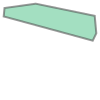

In [48]:
from shapely.geometry import Polygon

acad_polygon_vertexes = [vertex for vertex in acad_polygon.Coordinates]
shapely_polygon = Polygon(
    [(acad_polygon_vertexes[i], acad_polygon_vertexes[i+1]) 
     for i in range(0, len(acad_polygon_vertexes), 2)])
shapely_polygon

In [42]:
from shapely.geometry import Point
target_layer_name = "номера"
texts_in_polygon = []
for obj in acad.iter_objects(['AcDbText', 'AcDbMText']):
    if obj.Layer == target_layer_name:
        x, y, _ = obj.InsertionPoint
        point = Point(x, y)
        if shapely_polygon.contains(point):
                texts_in_polygon.append((obj.TextString, Point(x, y)))
texts_in_polygon

[('1', <POINT (3075.966 1696.605)>),
 ('10', <POINT (3104.044 1698.544)>),
 ('11', <POINT (3105.091 1695.948)>),
 ('12', <POINT (3106.333 1693.701)>),
 ('14', <POINT (3104.361 1692.888)>),
 ('13', <POINT (3107.489 1689.421)>),
 ('9', <POINT (3104.13 1690.619)>),
 ('15', <POINT (3092.269 1693.404)>),
 ('28', <POINT (3097.32 1694.253)>),
 ('28', <POINT (3098.978 1697.659)>),
 ('28', <POINT (3100.419 1697.392)>)]

In [49]:
numbers_layers = ["номера"]
lines_layers = ["полосы"]
contours_layers = ["контуры"]
min_distance = 0.01

In [62]:
import pandas as pd
from pyautocad.utils import mtext_to_string
acad = Autocad()
numbers_data = []

for obj in acad.iter_objects(['AcDbText', 'AcDbMText']):
    if obj.ObjectName == 'AcDbText' and obj.Layer in numbers_layers:
        x, y, _ = obj.InsertionPoint
        numbers_data.append({
            'number': obj.TextString,
            'position': Point(x, y)
        })
    elif obj.ObjectName == 'AcDbMText' and obj.Layer in numbers_layers:
        x, y, _ = obj.InsertionPoint
        numbers_data.append({
            'number': mtext_to_string(obj.TextString).replace('\n', ' '),
            'position': Point(x, y)
        })

numbers_df = pd.DataFrame(numbers_data)
numbers_df

,number,position
0,1,POINT (3075.965582309878 1696.6051757815592)
1,2,POINT (3074.823165523758 1693.9006874227402)
2,3,POINT (3108.838205298518 1707.285109871409)
3,4,POINT (3114.150988844972 1707.4695572873902)
4,5,POINT (3115.690642463274 1707.5867820573599)
5,6,POINT (3115.1004453425708 1706.18062074892)
6,7,POINT (3114.699609216242 1705.0905155704238)
7,10,POINT (3104.043722283615 1698.543651078497)
8,11,POINT (3105.090899215862 1695.9481208535972)
9,12,POINT (3106.332887793542 1693.7013226121771)


In [97]:
from shapely.geometry import LineString
acad = Autocad()
shapes_data = []
for obj in acad.iter_objects(['AcDbLine', 'AcDbPolyline', 'AcDbPolygon']):
    if obj.ObjectName == 'AcDbLine' and obj.Layer in lines_layers:
        shape = LineString([(obj.StartPoint[0], obj.StartPoint[1]),
                            (obj.EndPoint[0], obj.EndPoint[1])])
        shapes_data.append({
            'geometry': shape,
            'type': 'LineString'
        })
    elif obj.ObjectName == 'AcDbPolyline' and obj.Layer in lines_layers:
        acad_polygon_vertexes = [vertex for vertex in obj.Coordinates]
        shape = LineString(
            [(acad_polygon_vertexes[i], acad_polygon_vertexes[i+1]) 
             for i in range(0, len(acad_polygon_vertexes), 2)])
        shapes_data.append({
            'geometry': shape,
            'type': 'LineString'
        })
    elif obj.ObjectName == 'AcDbPolyline' and obj.Layer in contours_layers:
        acad_polygon_vertexes = [vertex for vertex in obj.Coordinates]
        shape = Polygon(
            [(acad_polygon_vertexes[i], acad_polygon_vertexes[i+1]) 
             for i in range(0, len(acad_polygon_vertexes), 2)])
        shapes_data.append({
            'geometry': shape,
            'type': 'Polygon'
        })
    # elif obj.ObjectName == 'AcDbPolyline' and obj.Layer in contours_layers:
    #     print(obj.ObjectName)

shapes_df = pd.DataFrame(shapes_data)
shapes_df

,geometry,type
0,"POLYGON ((3106.916523995033 1690.249262830753,...",Polygon
1,POLYGON ((3075.045526933311 1693.2592293092591...,Polygon
2,LINESTRING (3092.268998306507 1693.40414713145...,LineString
3,LINESTRING (3099.2754038714006 1706.8144261618...,LineString
4,POLYGON ((3106.4966015613422 1689.562929311654...,Polygon
5,POLYGON ((3100.4190364519973 1697.392114117334...,Polygon


In [98]:
# Связывание номеров и фигур
numbers_shapes_data = []
if not numbers_df.empty and not shapes_df.empty:
    # Создаем геометрические точки для всех номеров
    number_points = numbers_df.apply(lambda row: row['position'], axis=1)

    # Для каждой фигуры проверяем все номера
    for shape_id, shape_row in shapes_df.iterrows():
        shape_type = shape_row['type']
        shape_geom = shape_row['geometry']

        # Вычисляем расстояния до всех точек
        if shape_type == 'LineString':
            distances = number_points.apply(lambda p: shape_geom.distance(p))
        else:
            distances = number_points.apply(lambda p: p.distance(shape_geom.exterior))

        # Находим номера, которые находятся достаточно близко
        close_numbers = distances[distances < min_distance]

        for number_id in close_numbers.index:
            numbers_shapes_data.append({
                'number_id': number_id,
                'shape_id': shape_id
            })

numbers_shapes_df = pd.DataFrame(numbers_shapes_data)
numbers_shapes_df

,number_id,shape_id
0,12,0
1,13,0
2,0,1
3,1,1
4,14,2
5,15,3
6,16,4
7,25,5


In [99]:
# Сбор деревьев (точечных объектов)
unassigned_numbers = numbers_df.index.difference(numbers_shapes_df['number_id'])

trees_data = []
for number_id in unassigned_numbers:
    trees_data.append({
        'number_id': number_id
    })

trees_df = pd.DataFrame(trees_data)
trees_df

,number_id
0,2
1,3
2,4
3,5
4,6
5,7
6,8
7,9
8,10
9,11


In [100]:
from src.parsing import Splitter

topographic_plan_data = []

for number_id in trees_df['number_id']:
    for _split_number in Splitter.number(numbers_df.iloc[number_id]['number']):
        topographic_plan_data.append(
            {
                'origin_number': numbers_df.iloc[number_id]['number'],
                'number_position': numbers_df.iloc[number_id]['position'],
                'split_number': _split_number,
                'type': 'Point',
                'geometry': numbers_df.iloc[number_id]['position'],
                'size': None
            }
        )

for numbers_shapes_id in numbers_shapes_df.index:
    
    number_id = numbers_shapes_df.iloc[numbers_shapes_id]['number_id']
    shape_id = numbers_shapes_df.iloc[numbers_shapes_id]['shape_id']
    shape: LineString | Polygon = shapes_df.iloc[shape_id]['geometry']
    shape_type = shapes_df.iloc[shape_id]['type']
    
    for _split_number in Splitter.number(numbers_df.iloc[number_id]['number']):
        topographic_plan_data.append(
            {
                'origin_number': numbers_df.iloc[number_id]['number'],
                'number_position': numbers_df.iloc[number_id]['position'],
                'split_number': _split_number,
                'type': shape_type,
                'geometry': shape,
                'size': shape.length if isinstance(shape, LineString) else shape.area
            }
        )

topographic_plan = pd.DataFrame(topographic_plan_data)
topographic_plan

,origin_number,number_position,split_number,type,geometry,size
0,3,POINT (3108.838205298518 1707.285109871409),3,Point,POINT (3108.838205298518 1707.285109871409),NaN
1,4,POINT (3114.150988844972 1707.4695572873902),4,Point,POINT (3114.150988844972 1707.4695572873902),NaN
2,5,POINT (3115.690642463274 1707.5867820573599),5,Point,POINT (3115.690642463274 1707.5867820573599),NaN
3,6,POINT (3115.1004453425708 1706.18062074892),6,Point,POINT (3115.1004453425708 1706.18062074892),NaN
4,7,POINT (3114.699609216242 1705.0905155704238),7,Point,POINT (3114.699609216242 1705.0905155704238),NaN
5,10,POINT (3104.043722283615 1698.543651078497),10,Point,POINT (3104.043722283615 1698.543651078497),NaN
6,11,POINT (3105.090899215862 1695.9481208535972),11,Point,POINT (3105.090899215862 1695.9481208535972),NaN
7,12,POINT (3106.332887793542 1693.7013226121771),12,Point,POINT (3106.332887793542 1693.7013226121771),NaN
8,14,POINT (3104.361115387819 1692.888423763281),14,Point,POINT (3104.361115387819 1692.888423763281),NaN
9,13,POINT (3107.4888707400646 1689.420932022136),13,Point,POINT (3107.4888707400646 1689.420932022136),NaN


In [159]:
import xlwings as xw
sheet = xw.sheets['Автокад']
# sheet["A1"].options(pd.DataFrame, header=1, index=True, expand='table').value = topographic_plan
sheet["A1"].value = ['index']
sheet["B1"].value = topographic_plan.columns.to_list()
row = 1
for _, series in topographic_plan.iterrows():
    row += 1
    data = [str(v) for v in series.to_list()]
    data[0], data[2] = f"'{data[0]}", f"'{data[2]}"
    data.insert(0, row-2)
    sheet[f'A{row}'].value = data
xw.sheets.active.tables.add(source=sheet["A1"].expand(), name='ТаксацияАвтокад', table_style_name='TableStyleMedium9')

TypeError: must be real number, not Point

<class 'shapely.geometry.polygon.Polygon'>


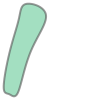

In [157]:
selected_cells = xw.apps.active.selection

from shapely.wkt import loads
shape = loads(selected_cells.value)

print(type(shape))
shape

In [158]:
xw.sheets['Автокад'].activate()